<h1>Training a Parts of speech tagger using NLTK tree bank data set </h1>

O POS refere-se à categorização das palavras em uma frase em funções sintáticas ou gramaticais específicas. Em inglês, as principais partes da fala são substantivos, pronomes, adjetivos, verbos, advérbios, preposições, determinantes e conjunções. A marcação POS é a tarefa de anexar uma dessas categorias a cada uma das palavras ou tokens em um texto. 

O NLTK fornece um conjunto de corpus de texto marcado e um conjunto de treinadores de POS para criar marcadores personalizados. Os conjuntos de dados marcados mais comuns no NLTK são o Penn Treebank e o Brown Corpus. 

O Penn Treebank consiste em uma coleção de textos analisados ​​de artigos de periódicos, conversas telefônicas e assim por diante. Da mesma forma, o Corpus Brown consiste em textos de 15 categorias diferentes de artigos (ciência, política, religião, esportes, etc.). Esses dados de texto fornecem marcação de granularidade muito fina, enquanto muitos aplicativos podem precisar apenas do seguinte conjunto de tags universal:

* VERBO: Verbos (todos os tempos e modos)
* NOUN: Substantivos (comuns e adequados)
* PRON: Pronomes
* ADJ: Adjetivos
* ADV: Advérbios
* ADP: Adposições (preposições e posposições)
* CONJ: Conjunções
* DET: Determinantes
* NUM: números cardinais
* PRT: Partículas ou outras palavras de função
* X-outro: palavras estrangeiras, erros de digitação, abreviações
* .: Pontuação

In [30]:
import nltk
#from nltk.examples.pt import *
import numpy as np
from nltk import word_tokenize
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from nltk.corpus import mac_morpho
from nltk.corpus import floresta

In [90]:
" ".join(mac_morpho.sents()[0])

'Jersei atinge média de Cr$ 1,4 milhão em a venda de a Pinhal em São Paulo'

In [77]:
from nltk.corpus import mac_morpho

# print sample
print(mac_morpho.words(), len(mac_morpho.words()))

['Jersei', 'atinge', 'média', 'de', 'Cr$', '1,4', ...] 1170095


In [78]:
for t in mac_morpho.tagged_words()[:6]:
    print(t)

('Jersei', 'N')
('atinge', 'V')
('média', 'N')
('de', 'PREP')
('Cr$', 'CUR')
('1,4', 'NUM')


In [79]:
print(mac_morpho.tagged_sents()[0])

[('Jersei', 'N'), ('atinge', 'V'), ('média', 'N'), ('de', 'PREP'), ('Cr$', 'CUR'), ('1,4', 'NUM'), ('milhão', 'N'), ('em', 'PREP|+'), ('a', 'ART'), ('venda', 'N'), ('de', 'PREP|+'), ('a', 'ART'), ('Pinhal', 'NPROP'), ('em', 'PREP'), ('São', 'NPROP'), ('Paulo', 'NPROP')]


In [36]:
# def simplify_tag(t):
#      if "+" in t:
#          return t[t.index("+")+1:]
#      else:
#          return t

# tsents = floresta.tagged_sents()
# tagged_sentences = [[(w.lower(), simplify_tag(t)) for (w,t) in sent] for sent in tsents if sent]
# train  = tagged_sentences[100:]
# test   = tagged_sentences[:100]

In [80]:
def sentence_features(st, ix):
    d_ft = {}
    d_ft['word']            = st[ix]
    d_ft['dist_from_first'] = ix - 0
    d_ft['dist_from_last']  = len(st) - ix
    d_ft['capitalized']     = st[ix][0].upper() == st[ix][0]
    d_ft['prefix1'] = st[ix][0]
    d_ft['prefix2'] = st[ix][:2]
    d_ft['prefix3'] = st[ix][:3]
    d_ft['suffix1'] = st[ix][-1]
    d_ft['suffix2'] = st[ix][-2:]
    d_ft['suffix3'] = st[ix][-3:]
    d_ft['prev_word'] = '' if ix==0 else st[ix-1]
    d_ft['next_word'] = '' if ix==(len(st)-1) else st[ix+1]
    d_ft['numeric']   = st[ix].isdigit()
    return d_ft

def get_untagged_sentence(tagged_sentence):
    [s,t] = zip(*tagged_sentence)
    return list(s)

In [82]:
#tagged_sentences  = nltk.corpus.treebank.tagged_sents(tagset='universal')
tagged_sentences  = nltk.corpus.mac_morpho.tagged_sents()
#tagged_sentences  = nltk.corpus.machado.tagged_sents()


len(tagged_sentences)

51397

In [83]:
#tagged_sentences = train

In [84]:
tagged_sentences[:2]

[[('Jersei', 'N'),
  ('atinge', 'V'),
  ('média', 'N'),
  ('de', 'PREP'),
  ('Cr$', 'CUR'),
  ('1,4', 'NUM'),
  ('milhão', 'N'),
  ('em', 'PREP|+'),
  ('a', 'ART'),
  ('venda', 'N'),
  ('de', 'PREP|+'),
  ('a', 'ART'),
  ('Pinhal', 'NPROP'),
  ('em', 'PREP'),
  ('São', 'NPROP'),
  ('Paulo', 'NPROP')],
 [('Programe', 'V'),
  ('sua', 'PROADJ'),
  ('viagem', 'N'),
  ('a', 'PREP|+'),
  ('a', 'ART'),
  ('Exposição', 'NPROP'),
  ('Nacional', 'NPROP'),
  ('do', 'NPROP'),
  ('Zebu', 'NPROP'),
  (',', ','),
  ('que', 'PRO-KS-REL'),
  ('começa', 'V'),
  ('dia', 'N'),
  ('25', 'N|AP')]]

In [42]:
def ext_ft(tg_sent):
    sent, tag = [], []
 
    for tg in tg_sent:
        for index in range(len(tg)):
            try:
                sent.append(sentence_features(get_untagged_sentence(tg), index))
                tag.append(tg[index][1])
            except:
                pass    
 
    return sent, tag

In [43]:
X, y = ext_ft(tagged_sentences)

X[:2], y[:2]

([{'word': 'Jersei',
   'dist_from_first': 0,
   'dist_from_last': 16,
   'capitalized': True,
   'prefix1': 'J',
   'prefix2': 'Je',
   'prefix3': 'Jer',
   'suffix1': 'i',
   'suffix2': 'ei',
   'suffix3': 'sei',
   'prev_word': '',
   'next_word': 'atinge',
   'numeric': False},
  {'word': 'atinge',
   'dist_from_first': 1,
   'dist_from_last': 15,
   'capitalized': False,
   'prefix1': 'a',
   'prefix2': 'at',
   'prefix3': 'ati',
   'suffix1': 'e',
   'suffix2': 'ge',
   'suffix3': 'nge',
   'prev_word': 'Jersei',
   'next_word': 'média',
   'numeric': False}],
 ['N', 'V'])

In [86]:
import pandas as pd

df1 = pd.DataFrame(X)
df1.head()

,capitalized,dist_from_first,dist_from_last,next_word,numeric,prefix1,prefix2,prefix3,prev_word,suffix1,suffix2,suffix3,word
0,True,0,16,atinge,False,J,Je,Jer,,i,ei,sei,Jersei
1,False,1,15,média,False,a,at,ati,Jersei,e,ge,nge,atinge
2,False,2,14,de,False,m,mé,méd,atinge,a,ia,dia,média
3,False,3,13,Cr$,False,d,de,de,média,e,de,de,de
4,True,4,12,"1,4",False,C,Cr,Cr$,de,$,r$,Cr$,Cr$


In [44]:
import gc 
gc.collect()

20

In [45]:
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html
from sklearn.feature_extraction import DictVectorizer
v             = DictVectorizer(sparse=False)
X_transformed = v.fit_transform(X)

In [92]:
from sklearn.feature_extraction import DictVectorizer

n_sample        = 20000
dict_vectorizer = DictVectorizer(sparse=False)
X_transformed   = dict_vectorizer.fit_transform(X[0:n_sample])
y_sampled       = y[0:n_sample]

X[0:n_sample][:2], X_transformed[:2]

([{'word': 'Jersei',
   'dist_from_first': 0,
   'dist_from_last': 16,
   'capitalized': True,
   'prefix1': 'J',
   'prefix2': 'Je',
   'prefix3': 'Jer',
   'suffix1': 'i',
   'suffix2': 'ei',
   'suffix3': 'sei',
   'prev_word': '',
   'next_word': 'atinge',
   'numeric': False},
  {'word': 'atinge',
   'dist_from_first': 1,
   'dist_from_last': 15,
   'capitalized': False,
   'prefix1': 'a',
   'prefix2': 'at',
   'prefix3': 'ati',
   'suffix1': 'e',
   'suffix2': 'ge',
   'suffix3': 'nge',
   'prev_word': 'Jersei',
   'next_word': 'média',
   'numeric': False}],
 array([[ 1.,  0., 16., ...,  0.,  0.,  0.],
        [ 0.,  1., 15., ...,  0.,  0.,  0.]]))

In [93]:
pd.DataFrame(X_transformed).head()

,0,1,2,3,4,5,6,7,8,9,...,16871,16872,16873,16874,16875,16876,16877,16878,16879,16880
0,1.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,2.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,3.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,4.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
X_transformed[:2].shape

(2, 16881)

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X_transformed, y_sampled, test_size=0.2, random_state=123)

In [49]:
import gc

X_transformed = y_sampled = None

gc.collect()

110

In [58]:
from sklearn.linear_model import LogisticRegression

#rf = RandomForestClassifier(n_jobs=4)
rf = LogisticRegression()
rf.fit(X_train,y_train)

/home/marlesson/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/marlesson/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [59]:
np.unique(y_train)

array(['!', '"', '$', '(', ')', ',', '-', ':', ';', 'ADJ', 'ADJ|EST',
       'ADV', 'ADV-KS-REL', 'ART', 'ART|+', 'CUR', 'KC', 'KC|[', 'KS',
       'N', 'NPROP', 'NUM', 'N|AP', 'N|DAT', 'N|EST', 'N|HOR', 'N|TEL',
       'PCP', 'PDEN', 'PREP', 'PREP|+', 'PRO-KS', 'PRO-KS-REL', 'PROADJ',
       'PROPESS', 'PROSUB', 'V', 'VAUX', 'VAUX|+', 'V|+', '['],
      dtype='<U10')

In [60]:
# Transforma string em vetor e usa o modelo treinado
def predict_pos_tags(sentence):
    tagged_sentence = []
    features = [sentence_features(sentence, index) for index in range(len(sentence))]
    features = dict_vectorizer.transform(features)
    tags     = rf.predict(features)
    return zip(sentence, tags)

In [ ]:
# train model
#rf           = model.fit(...) #

In [97]:
# Evaluate
predictions  = rf.predict(X_test)
accuracy_score(y_test,predictions)

0.92675

In [96]:
# sentence
test_sentence = "O rato roeu a roupa do rei de Roma"

# predict
for tagged in predict_pos_tags(test_sentence.split()):
    print(tagged)

('O', 'ART')
('rato', 'N')
('roeu', 'V')
('a', 'ART')
('roupa', 'N')
('do', 'NPROP')
('rei', 'N')
('de', 'PREP')
('Roma', 'NPROP')


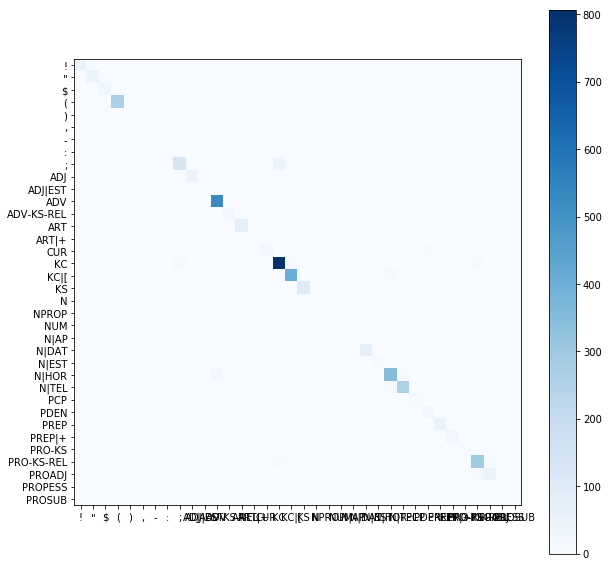

In [100]:
conf_matrix = confusion_matrix(y_test,predictions)

plt.figure(figsize=(10,10))
plt.xticks(np.arange(len(rf.classes_)),rf.classes_)
plt.yticks(np.arange(len(rf.classes_)),rf.classes_)
plt.imshow(conf_matrix,cmap=plt.cm.Blues)
plt.colorbar()

In [29]:
# feature_list = zip(dict_vectorizer.get_feature_names(),rf.feature_importances_)
# sorted_features = sorted(feature_list,key=lambda x: x[1], reverse=True)
# print(sorted_features[0:20])